In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
Path  = r'/Users/ghalebju/Desktop/Data Analysis Format/Part 4/Instacart Basket Analysis'

In [3]:
ords_prods_custs_merged = pd.read_pickle(os.path.join (Path,'02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [4]:
ords_prods_custs_merged.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19453578 entries, 0 to 19453577
Data columns (total 35 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 object  
 2   eval_set                object  
 3   order_number            int64   
 4   order_dow               int64   
 5   order_hour_of_day       int64   
 6   days_since_prior_order  float64 
 7   product_id              int64   
 8   add_to_cart_order       int64   
 9   reordered               int64   
 10  _merge                  category
 11  Unnamed: 0              int64   
 12  product_name            object  
 13  aisle_id                int64   
 14  department_id           int64   
 15  prices                  float64 
 16  price_range_loc         object  
 17  price-range loc         object  
 18  busiest_day             object  
 19  busiest_day_1           object  
 20  busiest_period_of_day   object  
 21  max_or

In [5]:
# we consider as a first level sensetive data would be (First_name and surname) and as a secound level sensetive data would be(n_depentants and income and family_status)

In [6]:
ords_prods_custs_merged.loc[ords_prods_custs_merged['state'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']), 'Region'] = 'Northeast'


In [7]:
ords_prods_custs_merged.loc[ords_prods_custs_merged['state'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'Region'] = 'Midwest'

In [8]:
ords_prods_custs_merged.loc[ords_prods_custs_merged['state'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'Region'] = 'South'

In [9]:
ords_prods_custs_merged.loc[ords_prods_custs_merged['state'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']), 'Region'] = 'West'

In [10]:
ords_prods_custs_merged['Region'].value_counts(dropna = False)

South        6099834
West         4979413
Midwest      4559266
Northeast    3435247
NaN           379818
Name: Region, dtype: int64

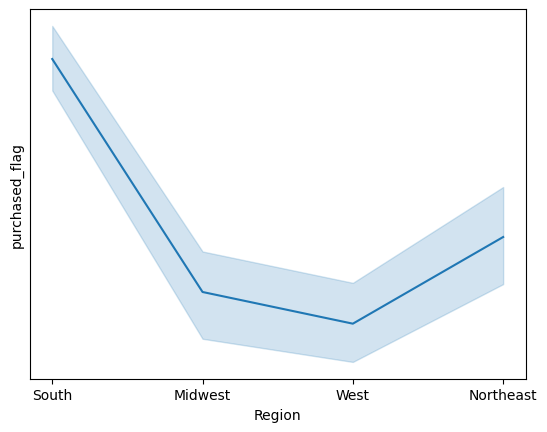

In [12]:
line = sns.lineplot( data = ords_prods_custs_merged, x = 'Region',y = 'purchased_flag')

In [13]:
High_activity_customers = ords_prods_custs_merged[ords_prods_custs_merged['order_frequency'] >= 5]


In [14]:
High_activity_customers.to_pickle(os.path.join( Path, '02 Data','Prepared Data', 'High_activity_customers.pkl'))

In [17]:
ords_prods_custs_merged

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_flag,First Name,Surnam,state,Age,date_joined,n_dependants,family_status,income,Region
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non-frequent customer,Linda,Nguyen,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Alabama,31,2/17/2019,3,married,40423,South
2,550135,1,prior,7,1,9,20.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Alabama,31,2/17/2019,3,married,40423,South
3,3108588,1,prior,8,1,14,14.0,196,2,1,...,Non-frequent customer,Linda,Nguyen,Alabama,31,2/17/2019,3,married,40423,South
4,2539329,1,prior,1,2,8,NaN,14084,2,0,...,Non-frequent customer,Linda,Nguyen,Alabama,31,2/17/2019,3,married,40423,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19453573,947687,201262,prior,1,4,17,NaN,551,1,0,...,Non-frequent customer,Shawn,Wood,Iowa,60,12/13/2019,0,divorced/widowed,122963,Midwest
19453574,2489238,201262,prior,2,3,18,20.0,551,1,1,...,Non-frequent customer,Shawn,Wood,Iowa,60,12/13/2019,0,divorced/widowed,122963,Midwest
19453575,2446452,201262,prior,3,6,17,30.0,551,1,1,...,Non-frequent customer,Shawn,Wood,Iowa,60,12/13/2019,0,divorced/widowed,122963,Midwest
19453576,276317,66343,prior,3,6,15,19.0,47210,1,1,...,Non-frequent customer,Jacqueline,Arroyo,Tennessee,22,9/12/2017,3,married,46151,South


In [31]:
ords_prods_custs_merged.loc[(ords_prods_custs_merged['Age'] < 25 ) & (ords_prods_custs_merged['income'] > 30000) & ( ords_prods_custs_merged['family_status'] != 'married') , 'customer profile'] = 'rich_young_single'


In [32]:
ords_prods_custs_merged.loc[(ords_prods_custs_merged['Age'] > 35 ) & (ords_prods_custs_merged['income'] < 30000) & ( ords_prods_custs_merged['family_status'] == 'married') , 'customer profile'] = 'poor_adult_parent'

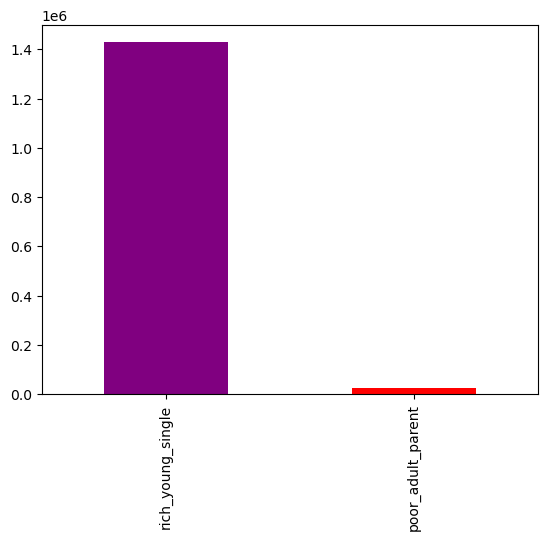

In [33]:
bar = ords_prods_custs_merged['customer profile'].value_counts().plot.bar(color =['purple', 'red', 'pink'])

In [35]:
ords_prods_custs_merged.groupby('customer profile').agg({'prices': ['mean', 'min', 'max']})

prices              
                        mean  min      max
customer profile                          
poor_adult_parent   6.516671  1.0     25.0
rich_young_single  11.892037  1.0  99999.0

In [36]:
ords_prods_custs_merged.groupby('customer profile').agg({'order_frequency': ['mean', 'min', 'max']})

order_frequency           
                             mean  min   max
customer profile                            
poor_adult_parent       11.837565  1.0  30.0
rich_young_single       10.383989  0.0  30.0

In [43]:
data_1 = ords_prods_custs_merged[ords_prods_custs_merged['customer profile'] == 'rich_young_single']

In [44]:
data_2 = ords_prods_custs_merged[ords_prods_custs_merged['customer profile'] == 'poor_adult_parent']

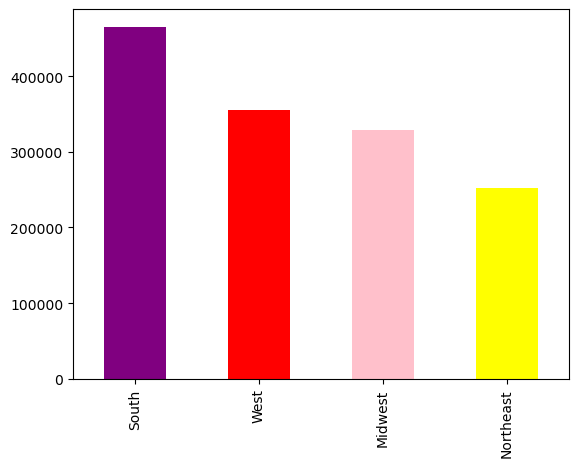

In [48]:
bar_1 = data_1['Region'].value_counts().plot.bar(color =['purple', 'red', 'pink' , 'yellow'])

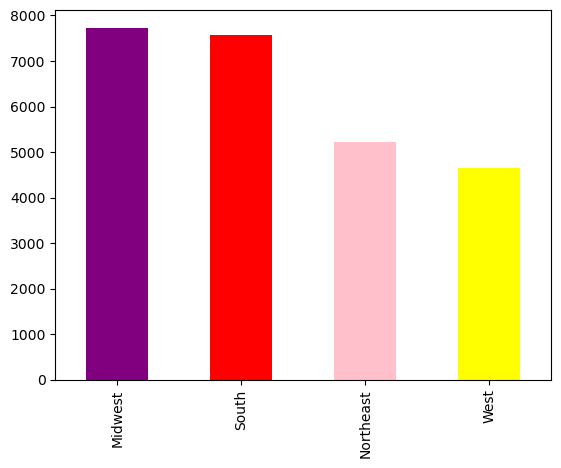

In [49]:
bar_2 = data_2['Region'].value_counts().plot.bar(color =['purple', 'red', 'pink' , 'yellow'])

In [50]:
df_dps = pd.read_csv(os.path.join (Path,'02 Data', 'Original Data', 'departments.csv'), index_col = False)

In [51]:
df_dps.T

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [52]:
df_dps = df_dps.T

In [53]:
df_dps.reset_index ()

,index,0
0,department_id,department
1,1,frozen
2,2,other
3,3,bakery
4,4,produce
5,5,alcohol
6,6,international
7,7,beverages
8,8,pets
9,9,dry goods pasta


In [54]:
new_header = df_dps.iloc [0]

In [55]:
df_dps_new = df_dps [1:]

In [56]:
df_dps_new

,0
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [57]:
df_dps_new.columns = new_header 

In [59]:
df_dps_new

department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [65]:
ords_prods_custs_dps_merged = ords_prods_custs_merged.merge(df_dps_new, on = 'department_id')

KeyError: 'department_id'

In [ ]:
#

In [66]:
line.figure.savefig(os.path.join(Path, '04 Analysis','Visualizations', 'line_chart_region_purchesedflag.png'))

In [67]:
bar.figure.savefig(os.path.join(Path, '04 Analysis','Visualizations', 'bar_chart_custs_profile.png'))

In [68]:
bar_1.figure.savefig(os.path.join(Path, '04 Analysis','Visualizations', 'bar_chart_Region.png'))

In [69]:
bar_2.figure.savefig(os.path.join(Path, '04 Analysis','Visualizations', 'bar_chart_Region_2.png'))

In [70]:
ords_prods_custs_merged.to_pickle(os.path.join( Path, '02 Data','Prepared Data', 'ords_prods_custs_merged_10.pkl'))